<a href="https://colab.research.google.com/github/DrewFinley/IMSE-541-HW/blob/main/LegoCarLab.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import math
import random
import scipy
import statistics
import numpy as np
import scipy.stats
from scipy.special import comb
from scipy import stats
import pandas as pd
import matplotlib.pyplot as plt
from matplotlib import cm
from matplotlib.ticker import LinearLocator
import plotly.graph_objects as go
import statsmodels.api as sm
from statsmodels.formula.api import ols
import statsmodels.stats.multicomp as mc
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import PolynomialFeatures

In [2]:
data = pd.read_csv('https://raw.githubusercontent.com/DrewFinley/IMSE-541-HW/main/LegoCarData.csv', sep=',', na_values=".")

data  

,Driver,WeightDistribution,Aero,RearHeight,WheelSize,AbsoluteDelta,RunOrder
0,-1,-1,-1,-1,-1,4.000,8
1,1,-1,-1,-1,-1,3.875,13
2,-1,1,-1,-1,-1,10.625,10
3,1,1,-1,-1,-1,4.125,29
4,-1,-1,1,-1,-1,3.625,6
5,1,-1,1,-1,-1,3.250,20
6,-1,1,1,-1,-1,2.750,12
7,1,1,1,-1,-1,2.500,17
8,-1,-1,-1,1,-1,11.375,21
9,1,-1,-1,1,-1,8.875,31


In [3]:
data2 = pd.read_csv('https://raw.githubusercontent.com/DrewFinley/IMSE-541-HW/main/LegoRampData.csv', sep=',', na_values=".")

data2

,Blocks,RampEnd,CarPlace,AbsoluteDelta,RunOrder
0,-1,-1,-1,8.00,8
1,1,-1,-1,10.00,2
2,-1,1,-1,2.00,13
3,1,1,-1,1.00,14
4,-1,-1,1,8.00,11
5,1,-1,1,6.00,4
6,-1,1,1,2.00,7
7,1,1,1,0.50,15
8,-1,-1,-1,11.00,3
9,1,-1,-1,9.00,9


In [4]:
df=data #df means data frame
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 32 entries, 0 to 31
Data columns (total 7 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   Driver              32 non-null     int64  
 1   WeightDistribution  32 non-null     int64  
 2   Aero                32 non-null     int64  
 3   RearHeight          32 non-null     int64  
 4   WheelSize           32 non-null     int64  
 5   AbsoluteDelta       32 non-null     float64
 6   RunOrder            32 non-null     int64  
dtypes: float64(1), int64(6)
memory usage: 1.9 KB


In [5]:
df2=data2
df2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16 entries, 0 to 15
Data columns (total 5 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Blocks         16 non-null     int64  
 1   RampEnd        16 non-null     int64  
 2   CarPlace       16 non-null     int64  
 3   AbsoluteDelta  16 non-null     float64
 4   RunOrder       16 non-null     int64  
dtypes: float64(1), int64(4)
memory usage: 768.0 bytes


In [6]:
Xmain=df[['Driver', 'WeightDistribution', 'Aero', 'RearHeight', 'WheelSize']]
Xmain

,Driver,WeightDistribution,Aero,RearHeight,WheelSize
0,-1,-1,-1,-1,-1
1,1,-1,-1,-1,-1
2,-1,1,-1,-1,-1
3,1,1,-1,-1,-1
4,-1,-1,1,-1,-1
5,1,-1,1,-1,-1
6,-1,1,1,-1,-1
7,1,1,1,-1,-1
8,-1,-1,-1,1,-1
9,1,-1,-1,1,-1


In [7]:
Xmain2=df2[['Blocks', 'RampEnd', 'CarPlace']]
Xmain2

,Blocks,RampEnd,CarPlace
0,-1,-1,-1
1,1,-1,-1
2,-1,1,-1
3,1,1,-1
4,-1,-1,1
5,1,-1,1
6,-1,1,1
7,1,1,1
8,-1,-1,-1
9,1,-1,-1


In [8]:
x1x2x3x4x5=df['Driver'] * df['WeightDistribution'] *df['Aero'] * df['RearHeight'] * df['WheelSize']
x1x2x3x4x5

0    -1
1     1
2     1
3    -1
4     1
5    -1
6    -1
7     1
8     1
9    -1
10   -1
11    1
12   -1
13    1
14    1
15   -1
16    1
17   -1
18   -1
19    1
20   -1
21    1
22    1
23   -1
24   -1
25    1
26    1
27   -1
28    1
29   -1
30   -1
31    1
dtype: int64

In [9]:
v1v2v3=df2['Blocks'] * df2['RampEnd'] *df2['CarPlace'] 
v1v2v3

0    -1
1     1
2     1
3    -1
4     1
5    -1
6    -1
7     1
8    -1
9     1
10    1
11   -1
12    1
13   -1
14   -1
15    1
dtype: int64

In [10]:
xx=Xmain.to_numpy()
poly= PolynomialFeatures(degree=4, interaction_only=True)
xxpd=pd.DataFrame(poly.fit_transform(xx), columns=['I', 'x1', 'x2', 'x3', 'x4', 'x5', 'x1x2', 'x1x3', 'x1x4', 'x1x5', 'x2x3', 'x2x4', 'x2x5', 'x3x4', 'x3x5', 'x4x5', 'x1x2x3', 'x1x2x4', 'x1x2x5', 'x1x3x4', 'x1x3x5', 'x1x4x5', 'x2x3x4', 'x2x3x5', 'x2x4x5', 'x3x4x5', 'x1x2x3x4', 'x1x2x3x5', 'x1x3x4x5', 'x2x3x4x5', 'x1x2x3x4x5'])
xxpd['x1x2x3x4']=x1x2x3x4x5
xxpd

,I,x1,x2,x3,x4,x5,x1x2,x1x3,x1x4,x1x5,...,x1x4x5,x2x3x4,x2x3x5,x2x4x5,x3x4x5,x1x2x3x4,x1x2x3x5,x1x3x4x5,x2x3x4x5,x1x2x3x4x5
0,1.0,-1.0,-1.0,-1.0,-1.0,-1.0,1.0,1.0,1.0,1.0,...,-1.0,-1.0,-1.0,-1.0,-1.0,-1,1.0,1.0,1.0,1.0
1,1.0,1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,...,1.0,-1.0,-1.0,-1.0,-1.0,1,-1.0,-1.0,-1.0,1.0
2,1.0,-1.0,1.0,-1.0,-1.0,-1.0,-1.0,1.0,1.0,1.0,...,-1.0,1.0,1.0,1.0,-1.0,1,-1.0,-1.0,1.0,-1.0
3,1.0,1.0,1.0,-1.0,-1.0,-1.0,1.0,-1.0,-1.0,-1.0,...,1.0,1.0,1.0,1.0,-1.0,-1,1.0,1.0,-1.0,-1.0
4,1.0,-1.0,-1.0,1.0,-1.0,-1.0,1.0,-1.0,1.0,1.0,...,-1.0,1.0,1.0,-1.0,1.0,1,-1.0,1.0,-1.0,-1.0
5,1.0,1.0,-1.0,1.0,-1.0,-1.0,-1.0,1.0,-1.0,-1.0,...,1.0,1.0,1.0,-1.0,1.0,-1,1.0,-1.0,1.0,-1.0
6,1.0,-1.0,1.0,1.0,-1.0,-1.0,-1.0,-1.0,1.0,1.0,...,-1.0,-1.0,-1.0,1.0,1.0,-1,1.0,-1.0,-1.0,1.0
7,1.0,1.0,1.0,1.0,-1.0,-1.0,1.0,1.0,-1.0,-1.0,...,1.0,-1.0,-1.0,1.0,1.0,1,-1.0,1.0,1.0,1.0
8,1.0,-1.0,-1.0,-1.0,1.0,-1.0,1.0,1.0,-1.0,1.0,...,1.0,1.0,-1.0,1.0,1.0,1,1.0,-1.0,-1.0,-1.0
9,1.0,1.0,-1.0,-1.0,1.0,-1.0,-1.0,-1.0,1.0,-1.0,...,-1.0,1.0,-1.0,1.0,1.0,-1,-1.0,1.0,1.0,-1.0


In [11]:
xx2=Xmain2.to_numpy()
poly2= PolynomialFeatures(degree=3, interaction_only=True)
xx2pd=pd.DataFrame(poly2.fit_transform(xx2), columns=['I', 'v1', 'v2', 'v3', 'v1v2', 'v1v3', 'v2v3', 'v1v2v3'])
xx2pd['v1v2v3']=v1v2v3
xx2pd

,I,v1,v2,v3,v1v2,v1v3,v2v3,v1v2v3
0,1.0,-1.0,-1.0,-1.0,1.0,1.0,1.0,-1
1,1.0,1.0,-1.0,-1.0,-1.0,-1.0,1.0,1
2,1.0,-1.0,1.0,-1.0,-1.0,1.0,-1.0,1
3,1.0,1.0,1.0,-1.0,1.0,-1.0,-1.0,-1
4,1.0,-1.0,-1.0,1.0,1.0,-1.0,-1.0,1
5,1.0,1.0,-1.0,1.0,-1.0,1.0,-1.0,-1
6,1.0,-1.0,1.0,1.0,-1.0,-1.0,1.0,-1
7,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1
8,1.0,-1.0,-1.0,-1.0,1.0,1.0,1.0,-1
9,1.0,1.0,-1.0,-1.0,-1.0,-1.0,1.0,1


In [12]:
# reduce model using main effect and two-way interactions 
# predicted response using skleran LinearRegression fit
#X=xxpd.drop(columns=['I'])
X=xxpd[['x1','x2','x3','x4','x5', 'x1x2', 'x1x3', 'x1x4', 'x1x5', 'x2x3', 'x2x4', 'x2x5', 'x3x4', 'x3x5', 'x4x5']]
Y=df[['AbsoluteDelta']]
regr=LinearRegression()
regr.fit(X,Y)
Yhat=regr.predict(X)
Y=Y.to_numpy()
eij=Y-Yhat
print(eij)


[[-2.4609375]
 [-1.1484375]
 [ 2.8203125]
 [-1.9921875]
 [ 0.9453125]
 [ 1.6015625]
 [-0.3984375]
 [ 0.6328125]
 [ 2.7890625]
 [ 0.5078125]
 [-1.8671875]
 [ 1.3515625]
 [-1.5234375]
 [-0.7109375]
 [-0.3046875]
 [-0.2421875]
 [ 0.0703125]
 [ 2.0078125]
 [ 0.0703125]
 [ 0.6328125]
 [-0.2109375]
 [-0.8046875]
 [-0.8359375]
 [-0.9296875]
 [-0.3046875]
 [-1.4609375]
 [-1.1171875]
 [ 0.1015625]
 [ 0.6953125]
 [ 0.0078125]
 [ 1.6328125]
 [ 0.4453125]]


In [13]:
# reduce model using main effect and two-way interactions 
# predicted response using skleran LinearRegression fit
#X=xxpd.drop(columns=['I'])
X2=xx2pd[['v1', 'v2', 'v3', 'v1v2', 'v1v3', 'v2v3', 'v1v2v3']]
Y2=df2[['AbsoluteDelta']]
regr2=LinearRegression()
regr2.fit(X2,Y2)
Yhat2=regr2.predict(X2)
Y2=Y2.to_numpy()
eij=Y2-Yhat2
print(eij)


[[-1.50000000e+00]
 [ 5.00000000e-01]
 [-5.00000000e-01]
 [-7.50000000e-01]
 [-3.50000000e+00]
 [ 8.88178420e-16]
 [ 2.66453526e-15]
 [-6.25000000e-01]
 [ 1.50000000e+00]
 [-5.00000000e-01]
 [ 5.00000000e-01]
 [ 7.50000000e-01]
 [ 3.50000000e+00]
 [ 8.88178420e-16]
 [ 2.66453526e-15]
 [ 6.25000000e-01]]


In [14]:
# use statsmodels for OLS fitting and t statistics
# in this case, X is xxpd with the first column I
X=xxpd[['I','x1','x2','x3','x4','x5', 'x1x2', 'x1x3', 'x1x4', 'x1x5', 'x2x3', 'x2x4', 'x2x5', 'x3x4', 'x3x5', 'x4x5']]
model = sm.OLS(Y, X)
res=model.fit()
print(res.summary())


                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       0.967
Model:                            OLS   Adj. R-squared:                  0.937
Method:                 Least Squares   F-statistic:                     31.52
Date:                Thu, 27 Oct 2022   Prob (F-statistic):           4.83e-09
Time:                        03:48:08   Log-Likelihood:                -53.531
No. Observations:                  32   AIC:                             139.1
Df Residuals:                      16   BIC:                             162.5
Df Model:                          15                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
I             10.6016      0.322     32.897      0.0

In [15]:
# use statsmodels for OLS fitting and t statistics
# in this case, X is xxpd with the first column I
X2=xx2pd[['I', 'v1', 'v2', 'v3', 'v1v2', 'v1v3', 'v2v3', 'v1v2v3']]
model2 = sm.OLS(Y2, X2)
res2=model2.fit()
print(res2.summary())


                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       0.885
Model:                            OLS   Adj. R-squared:                  0.784
Method:                 Least Squares   F-statistic:                     8.790
Date:                Thu, 27 Oct 2022   Prob (F-statistic):            0.00323
Time:                        03:48:08   Log-Likelihood:                -28.225
No. Observations:                  16   AIC:                             72.45
Df Residuals:                       8   BIC:                             78.63
Df Model:                           7                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
I              5.4844      0.499     10.985      0.0

/usr/local/lib/python3.7/dist-packages/scipy/stats/stats.py:1542: UserWarning: kurtosistest only valid for n>=20 ... continuing anyway, n=16
  "anyway, n=%i" % int(n))


# y = 5.4844 -3.6406v2

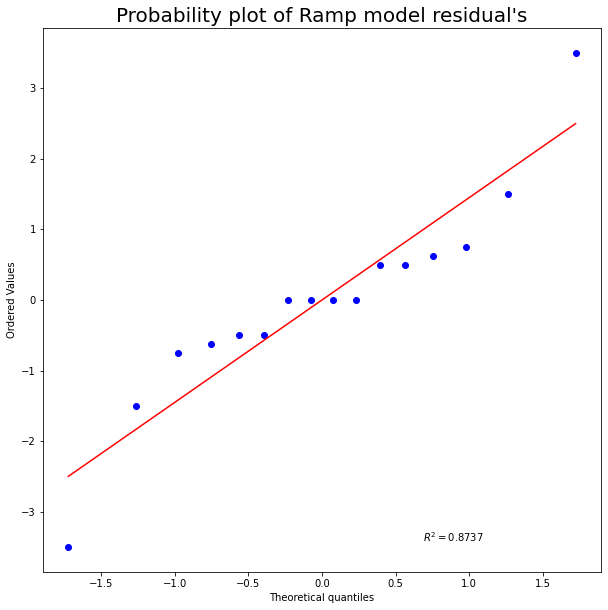

In [16]:
fig = plt.figure(figsize= (10, 10))
ax = fig.add_subplot(111)

normality_plot, stat = stats.probplot(res2.resid, plot= plt, rvalue= True)
ax.set_title("Probability plot of Ramp model residual's", fontsize= 20)
ax.set

plt.show()

In [17]:
# Reduced model 
X=xxpd[['x2','x3', 'x4', 'x5', 'x3x5', 'x4x5']]
Y=df[['AbsoluteDelta']]
regr2=LinearRegression()
regr2.fit(X,Y)
Yhat2=regr2.predict(X)
X2=xxpd[['I','x2','x3', 'x4', 'x5', 'x3x5', 'x4x5']]
model2 = sm.OLS(Y, X2)
res2=model2.fit()
print(res2.summary())

#Yhat

                            OLS Regression Results                            
Dep. Variable:          AbsoluteDelta   R-squared:                       0.954
Model:                            OLS   Adj. R-squared:                  0.942
Method:                 Least Squares   F-statistic:                     85.68
Date:                Thu, 27 Oct 2022   Prob (F-statistic):           1.91e-15
Time:                        03:48:09   Log-Likelihood:                -59.104
No. Observations:                  32   AIC:                             132.2
Df Residuals:                      25   BIC:                             142.5
Df Model:                           6                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
I             10.6016      0.307     34.549      0.0

# y = 10.6016 + 1.3203x2 - 1.0938x3 + 4.2813x4 + 4.4766x5 + .9219x3x5 + 2.5x4x5
 

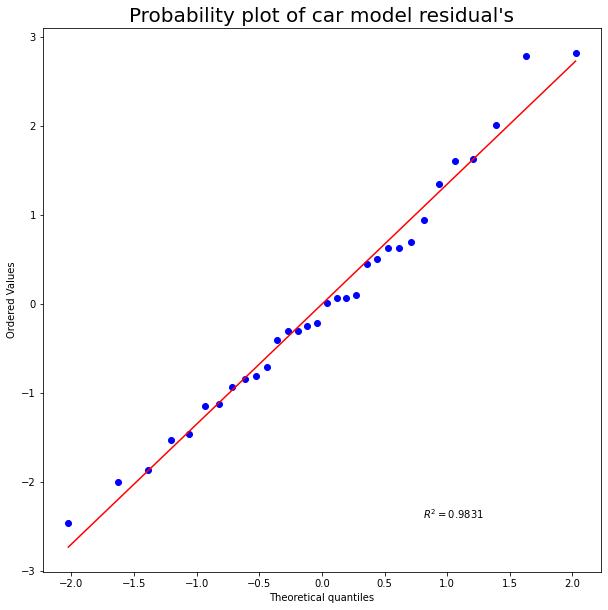

In [18]:
fig = plt.figure(figsize= (10, 10))
ax = fig.add_subplot(111)

normality_plot, stat = stats.probplot(res.resid, plot= plt, rvalue= True)
ax.set_title("Probability plot of car model residual's", fontsize= 20)
ax.set

plt.show()

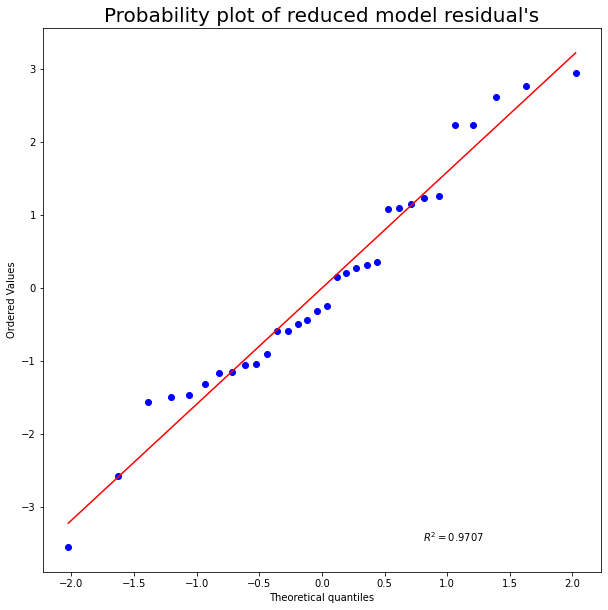

In [19]:
fig = plt.figure(figsize= (10, 10))
ax = fig.add_subplot(111)

normality_plot, stat = stats.probplot(res2.resid, plot= plt, rvalue= True)
ax.set_title("Probability plot of reduced model residual's", fontsize= 20)
ax.set

plt.show()

In [20]:
# testing the random order for collecting observations 
# Minitab calls the order variable, run order
# the following code generate a random order
# you should conduct your experiments using the random order generated
# for example, the first number is 5, it means that you will run the setting 5 in the experimentation table
# observation label 5 is primier type 3 and application method 2 (spraying)
# the run observation 11 and so on until all observations are collected
# import random (see the first cell)
N = len(Y)
#c = list(range(0, N))
#xorder = random.sample(c, N) # this should be replaced by the exact run order if the random order is not used

order=df[['RunOrder']]
order=order.to_numpy() 
#the following step reduces the index in run_order by 1 so that the python index from 0 can function properly
order2=np.zeros(N) #order 2 is a list of zero
for i in range(N):
    order2[i]=order[i]-1 #assign the value of element in an array into the list


print('order of observations/residuals is')
print(order2)
# convert the array into a list for indexing
#order=order.reshape((1,N))
#order=order.tolist()
#print(order)

order of observations/residuals is
[ 7. 12.  9. 28.  5. 19. 11. 16. 20. 30. 17.  6.  0. 23. 31. 21. 15.  1.
 27. 13.  8. 29. 14.  4. 10. 22. 24.  3. 26. 18.  2. 25.]


In [21]:
res.resid


0    -2.460938
1    -1.148438
2     2.820312
3    -1.992188
4     0.945312
5     1.601563
6    -0.398438
7     0.632813
8     2.789062
9     0.507812
10   -1.867188
11    1.351562
12   -1.523438
13   -0.710938
14   -0.304688
15   -0.242188
16    0.070312
17    2.007813
18    0.070312
19    0.632812
20   -0.210937
21   -0.804687
22   -0.835938
23   -0.929687
24   -0.304687
25   -1.460938
26   -1.117187
27    0.101562
28    0.695312
29    0.007813
30    1.632812
31    0.445312
dtype: float64

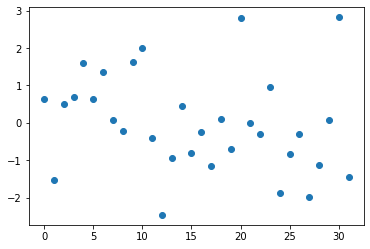

In [22]:
# Use the run order to reflect the sequence that we collected the data 
# if there is no pattern in the scatter plot, then don't reject independence assumption

eij=res.resid

x = range(0,N) # from the first collected obs to the last in order
y = eij[order2] # assign run order (see the previous code box)

plt.scatter(x, y)

In [23]:
# testing the random order for collecting observations 
# Minitab calls the order variable, run order
# the following code generate a random order
# you should conduct your experiments using the random order generated
# for example, the first number is 5, it means that you will run the setting 5 in the experimentation table
# observation label 5 is primier type 3 and application method 2 (spraying)
# the run observation 11 and so on until all observations are collected
# import random (see the first cell)
N = len(Y2)
#c = list(range(0, N))
#xorder = random.sample(c, N) # this should be replaced by the exact run order if the random order is not used

order=df2[['RunOrder']]
order=order.to_numpy() 
#the following step reduces the index in run_order by 1 so that the python index from 0 can function properly
order2=np.zeros(N) #order 2 is a list of zero
for i in range(N):
    order2[i]=order[i]-1 #assign the value of element in an array into the list


print('order of observations/residuals is')
print(order2)
# convert the array into a list for indexing
#order=order.reshape((1,N))
#order=order.tolist()
#print(order)

order of observations/residuals is
[ 7.  1. 12. 13. 10.  3.  6. 14.  2.  8. 11.  4.  0.  9.  5. 15.]


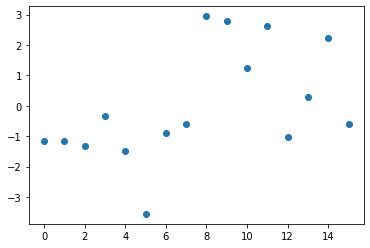

In [24]:
# Use the run order to reflect the sequence that we collected the data 
# if there is no pattern in the scatter plot, then don't reject independence assumption

eij=res2.resid

x = range(0,N) # from the first collected obs to the last in order
y = eij[order2] # assign run order (see the previous code box)

plt.scatter(x, y)

In [25]:
Y=df[['AbsoluteDelta']]
regr=LinearRegression()
regr.fit(X,Y)
Yhat=regr.predict(X)
Yhat

array([[ 5.0390625],
       [ 5.0390625],
       [ 7.6796875],
       [ 7.6796875],
       [ 1.0078125],
       [ 1.0078125],
       [ 3.6484375],
       [ 3.6484375],
       [ 8.6015625],
       [ 8.6015625],
       [11.2421875],
       [11.2421875],
       [ 4.5703125],
       [ 4.5703125],
       [ 7.2109375],
       [ 7.2109375],
       [ 7.1484375],
       [ 7.1484375],
       [ 9.7890625],
       [ 9.7890625],
       [ 6.8046875],
       [ 6.8046875],
       [ 9.4453125],
       [ 9.4453125],
       [20.7109375],
       [20.7109375],
       [23.3515625],
       [23.3515625],
       [20.3671875],
       [20.3671875],
       [23.0078125],
       [23.0078125]])

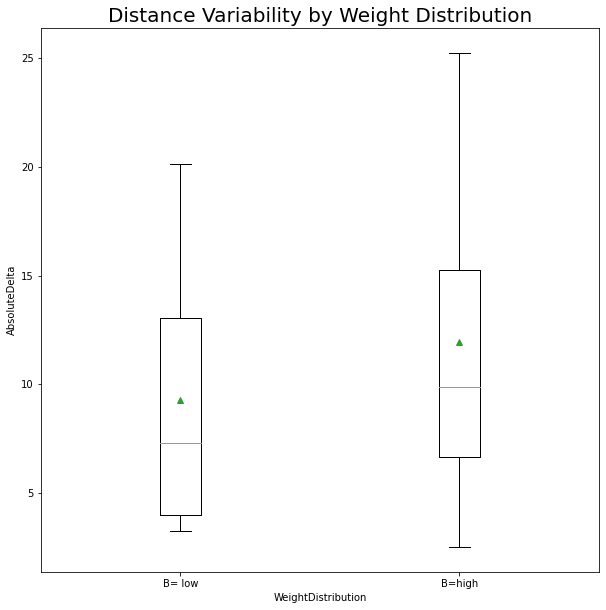

In [26]:
# Box plots by factor A'
# If the IRQ=75% quartitle - 25% quartile are very different, then question the constant variance assumption
# If the F test p value is very small, we reject H0 and can use this box plot to identify the best factor level

fig = plt.figure(figsize= (10, 10))
ax = fig.add_subplot(111)

ax.set_title("Distance Variability by Weight Distribution", fontsize= 20)
ax.set

data2 = [df['AbsoluteDelta'][df['WeightDistribution'] == -1],
             df['AbsoluteDelta'][df['WeightDistribution'] == 1]]


ax.boxplot(data2,
           labels= ['B= low', 'B=high'],
           showmeans= True)

plt.xlabel("WeightDistribution")
plt.ylabel("AbsoluteDelta")

plt.show()

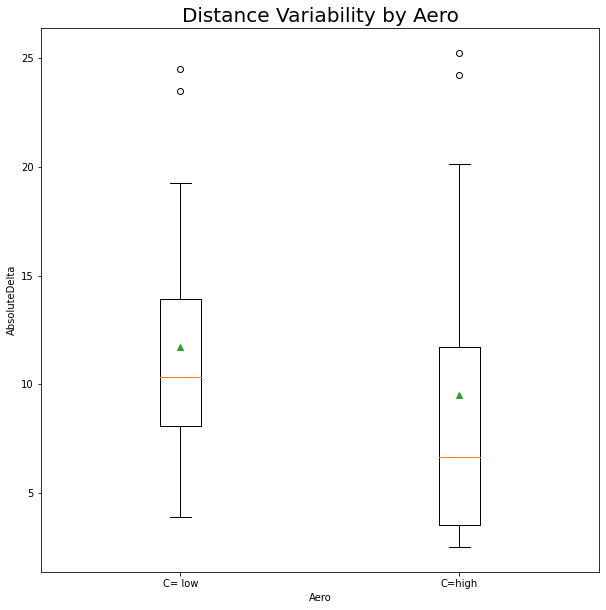

In [27]:
# Box plots by factor A'
# If the IRQ=75% quartitle - 25% quartile are very different, then question the constant variance assumption
# If the F test p value is very small, we reject H0 and can use this box plot to identify the best factor level

fig = plt.figure(figsize= (10, 10))
ax = fig.add_subplot(111)

ax.set_title("Distance Variability by Aero", fontsize= 20)
ax.set

data2 = [df['AbsoluteDelta'][df['Aero'] == -1],
             df['AbsoluteDelta'][df['Aero'] == 1]]


ax.boxplot(data2,
           labels= ['C= low', 'C=high'],
           showmeans= True)

plt.xlabel("Aero")
plt.ylabel("AbsoluteDelta")

plt.show()

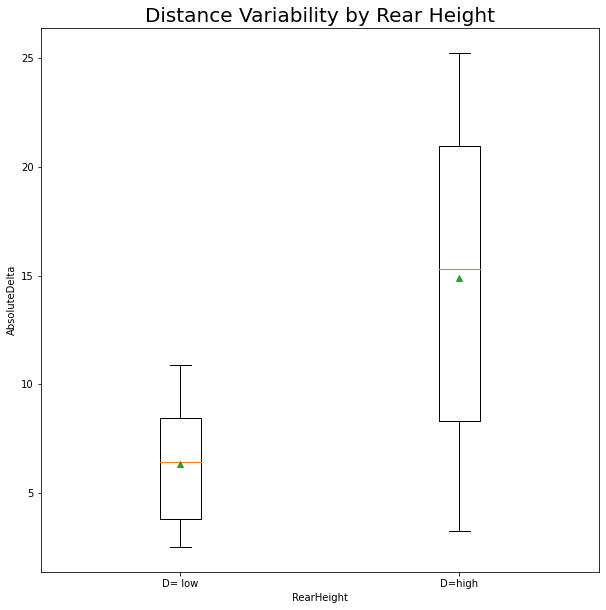

In [28]:
# Box plots by factor A'
# If the IRQ=75% quartitle - 25% quartile are very different, then question the constant variance assumption
# If the F test p value is very small, we reject H0 and can use this box plot to identify the best factor level

fig = plt.figure(figsize= (10, 10))
ax = fig.add_subplot(111)

ax.set_title("Distance Variability by Rear Height", fontsize= 20)
ax.set

data2 = [df['AbsoluteDelta'][df['RearHeight'] == -1],
             df['AbsoluteDelta'][df['RearHeight'] == 1]]


ax.boxplot(data2,
           labels= ['D= low', 'D=high'],
           showmeans= True)

plt.xlabel("RearHeight")
plt.ylabel("AbsoluteDelta")

plt.show()

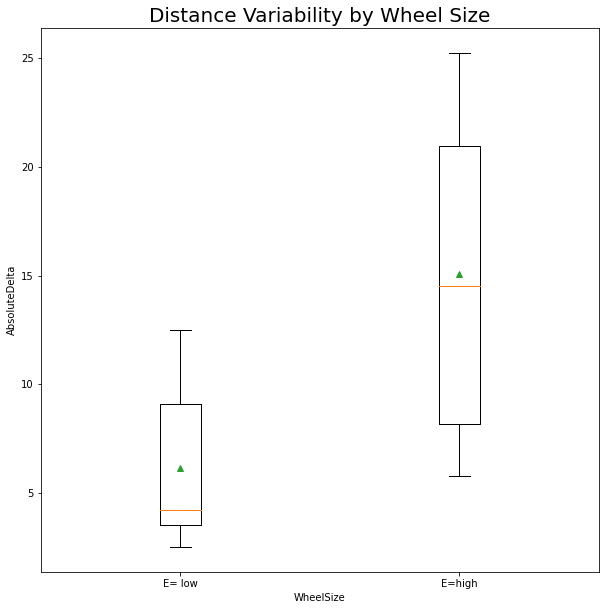

In [29]:
# Box plots by factor A'
# If the IRQ=75% quartitle - 25% quartile are very different, then question the constant variance assumption
# If the F test p value is very small, we reject H0 and can use this box plot to identify the best factor level

fig = plt.figure(figsize= (10, 10))
ax = fig.add_subplot(111)

ax.set_title("Distance Variability by Wheel Size", fontsize= 20)
ax.set

data2 = [df['AbsoluteDelta'][df['WheelSize'] == -1],
             df['AbsoluteDelta'][df['WheelSize'] == 1]]


ax.boxplot(data2,
           labels= ['E= low', 'E=high'],
           showmeans= True)

plt.xlabel("WheelSize")
plt.ylabel("AbsoluteDelta")

plt.show()